# 주피터 노트북(파이썬)으로 온도 데이타를 SQL에 저장하고 시계열분석하기

<img src="https://raw.githubusercontent.com/leehaesung/SQLite3_with_LTE_CatM1/master/01_Images/01_Setting.png" height="400" width="450" >

* How to install Paho-MQTT :
```
sudo pip install paho-mqtt
```

In [ ]:
!pip install paho-mqtt

## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [16]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
conn.execute('''CREATE TABLE HOME(
    LOCAL INT PRIMARY KEY NOT NULL, 
    TEMP INT NOT NULL
    );''')
print("Table created successfully");

conn.close()

Table created successfully


## DROP TABLE

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [15]:
import sqlite3
conn = sqlite3.connect('sqliteLTECatM1')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print("Deleted the table successfully");
conn.commit()
conn.close()

Deleted the table successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [25]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("INSERT INTO HOME (LOCAL,TEMP) \
      VALUES (20171201221159, 24)");

conn.commit()
print("Records created successfully");
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [27]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print("Local Time   = ", row[0])
    print("Temperature  = ", row[1])
    print("\n")
   

print("Operation done successfully");
conn.close()

Opened database successfully
Local Time   =  20171201221159
Temperature  =  24


Operation done successfully


In [29]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1');
print("Opened database successfully");
print("");
print("   Local Time |T(°C)");
print("===========================");
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print(row[0],row[1])
    
conn.close()

Opened database successfully

   Local Time |T(°C)
20171201221159 24


#### Searching Temperature Data

In [30]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteLTECatM1')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print("Opened database successfully")
    print("")
    print("   Local Time |T(°C)")
    print("===========================")
    
    for row in cursor:
        print(row[0],row[1])

In [31]:
# Put any temperature.
search_temperature(24)

Opened database successfully

   Local Time |T(°C)
20171201221159 24


## Eclipse Paho™ MQTT Python Pub/Sub Client

In [32]:
import sys
import json

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['catm1topic']

m = subscribe.simple(topics, hostname="broker.hivemq.com", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)
    da = json.loads(a.payload)
    print(da)
    json_data = da["temperature"]
    print(json_data)

catm1topic
b'{"device":"catm1","temperature":"28.211"}'
{'device': 'catm1', 'temperature': '28.211'}
28.211
catm1topic
b'{"device":"catm1","temperature":"28.211"}'
{'device': 'catm1', 'temperature': '28.211'}
28.211


In [ ]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    print("%s : %s" % (message.topic, message.payload))
    buf = message.payload
    
subscribe.callback(print_msg, "catm1topic", hostname="broker.hivemq.com")

catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'
catm1topic : b'{"device":"catm1","temperature":"28.211"}'


##  INSERT QUERY (IN REAL TIME)

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale
import json
import datetime

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("INSERT OPERATION")
print("    Date      | Temperature[°C]:")
print("==================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    # {"device":"catm1","temperature":"29.011"}
    local = datetime.datetime.now().strftime("%y%m%d%H%M%S")
       
    jsonData = json.loads(data)
    temp = str(jsonData['temperature'])         
    
    print(local," | ",temp)
    
    str1 = "INSERT INTO HOME (LOCAL,TEMP) \
      VALUES ("
    str2 = local 
    str3 = ", "
    str4 = temp
    str5 = " )"
    insert = str1 + str2 + str3 + str4 + str5
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "catm1topic", hostname="broker.hivemq.com")

Opened database successfully

INSERT OPERATION
    Date      | Temperature[°C]:
190604033350  |  20.211
190604033400  |  20.211
190604033410  |  20.211
190604033428  |  20.713
190604033437  |  20.713
190604033448  |  20.713
190604033500  |  21.013
190604033510  |  21.013
190604033521  |  21.013
190604033530  |  21.013
190604033543  |  22.313
190604033553  |  22.313
190604033603  |  22.313
190604033613  |  22.313
190604033629  |  22.817
190604033639  |  22.817
190604033649  |  22.817
190604033700  |  23.817
190604033710  |  23.817
190604033720  |  23.817
190604033735  |  24.114
190604033745  |  24.114
190604033755  |  24.114
190604033805  |  24.114
190604033815  |  24.114
190604033833  |  26.417
190604033843  |  26.417
190604033853  |  26.417
190604033903  |  26.417
190604033913  |  26.417
190604033923  |  26.417
190604033942  |  28.127
190604033952  |  28.127
190604034002  |  28.127
190604034012  |  28.127
190604034029  |  28.327
190604034039  |  28.327
190604034049  |  28.327
19060403

## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [1]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0]," | ",row[1])
    
conn.close()

Opened database successfully

    Date      | Temperature[°C]:
190604033350  |  20.211
190604033400  |  20.211
190604033410  |  20.211
190604033428  |  20.713
190604033437  |  20.713
190604033448  |  20.713
190604033500  |  21.013
190604033510  |  21.013
190604033521  |  21.013
190604033530  |  21.013
190604033543  |  22.313
190604033553  |  22.313
190604033603  |  22.313
190604033613  |  22.313
190604033629  |  22.817
190604033639  |  22.817
190604033649  |  22.817
190604033700  |  23.817
190604033710  |  23.817
190604033720  |  23.817
190604033735  |  24.114
190604033745  |  24.114
190604033755  |  24.114
190604033805  |  24.114
190604033815  |  24.114
190604033833  |  26.417
190604033843  |  26.417
190604033853  |  26.417
190604033903  |  26.417
190604033913  |  26.417
190604033923  |  26.417
190604033942  |  28.127
190604033952  |  28.127
190604034002  |  28.127
190604034012  |  28.127
190604034029  |  28.327
190604034039  |  28.327
190604034049  |  28.327
190604034100  |  28.327
1

## SELECT QUERY & PUSH DATA INTO BOX

In [24]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self, item):
        return self.items.pop(item)

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


tempBox = Stack()
temPopBox = Stack() 
timeBox = Stack()

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully")
print("")

cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    tempBox.push(row[1])
    temPopBox.push(row[1])
    
    #print(row[0],row[1],row[2])

# Making time = 1,2,3,4 .... n    
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
print("x(time) = ")    
print(timeBox.items)
print("")
print("y1(Temperature) = ") 
print(tempBox.items)
print("")

xTime = timeBox.items
y1Data = tempBox.items

# Comparing between max and min in tData
highTemBit = y1Data.pop(max-1)
lowTemBit = y1Data.pop(0)


if highTemBit > lowTemBit:
    print("The temperature data is ascending.")

elif highTemBit < lowTemBit:
    print("The temperature data is descending.")
    
elif highTemBit == lowTemBit:
    print("The temperature data is stable.")
    
conn.close()

Opened database successfully

x(time) = 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

y1(Temperature) = 
[20.211, 20.211, 20.211, 20.713, 20.713, 20.713, 21.013, 21.013, 21.013, 21.013, 22.313, 22.313, 22.313, 22.313, 22.817, 22.817, 22.817, 23.817, 23.817, 23.817, 24.114, 24.114, 24.114, 24.114, 24.114, 26.417, 26.417, 26.417, 26.417, 26.417, 26.417, 28.127, 28.127, 28.127, 28.127, 28.327, 28.327, 28.327, 28.327, 28.327, 28.327, 28.327, 28.327, 28.327, 29.727, 29.727, 29.727, 31.729, 31.729, 31.729]

The temperature data is ascending.


In [25]:
print("Max & Min Temperature:")
print(highTemBit)
print(lowTemBit)

Max & Min Temperature:
31.729
20.211


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [24]:
import sqlite3

conn = sqlite3.connect('sqliteLTECatM1')
print("Opened database successfully");

conn.execute("DELETE from HOME where LOCAL = 190604021946;")
#conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514283551781 AND 1514285943367;")
conn.commit()
print("Total number of rows deleted :", conn.total_changes)

print("")
print("    Date      | Temperature[°C]:")
print("==================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1])

print("DELETE Operation done successfully")
conn.close()

Opened database successfully
Total number of rows deleted : 1

    Date      | Temperature[°C]:
190604021915 27.231
190604021954 26.231
190604022027 24.211
190604022057 24.211
190604022108 23.511
DELETE Operation done successfully


## CSV file

In [27]:
import sqlite3
import csv

sqlconnector = sqlite3.connect('sqliteLTECatM1')
sql3_cursor = sqlconnector.cursor()
sql3_cursor.execute('SELECT * FROM HOME')
with open('temp_catm1.csv','w') as out_csv_file:
  csv_out = csv.writer(out_csv_file)
  # write header                        
  csv_out.writerow([d[0] for d in sql3_cursor.description])
  # write data                          
  for result in sql3_cursor:
    csv_out.writerow(result)
sqlconnector.close()

In [28]:
!ls *.csv

mydb_hum.csv   mydb_temp.csv  pm10.csv       pm25.csv       temp_catm1.csv


In [29]:
!cat temp_catm1.csv

In [30]:
# create and evaluate an updated autoregressive model
import pandas as pa
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#
# Data sets

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
#view basic stats information on data
series.describe()

count    50.000000
mean     25.337380
std       3.460518
min      20.211000
25%      22.313000
50%      25.265500
75%      28.327000
max      31.729000
Name: TEMP, dtype: float64

In [32]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 

#view top 10 records
series.head(5)

LOCAL
190604033350    20.211
190604033400    20.211
190604033410    20.211
190604033428    20.713
190604033437    20.713
Name: TEMP, dtype: float64

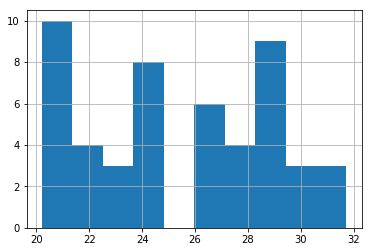

In [33]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

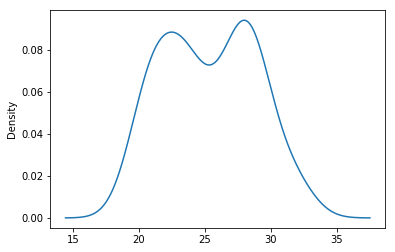

In [34]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

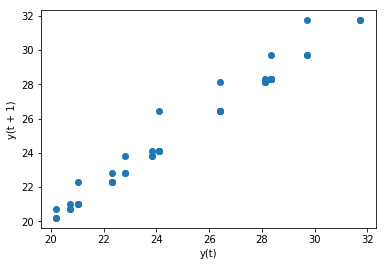

In [35]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [36]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe
print(result)

         t     t+1
0      NaN  20.211
1   20.211  20.211
2   20.211  20.211
3   20.211  20.713
4   20.713  20.713
5   20.713  20.713
6   20.713  21.013
7   21.013  21.013
8   21.013  21.013
9   21.013  21.013
10  21.013  22.313
11  22.313  22.313
12  22.313  22.313
13  22.313  22.313
14  22.313  22.817
15  22.817  22.817
16  22.817  22.817
17  22.817  23.817
18  23.817  23.817
19  23.817  23.817
20  23.817  24.114
21  24.114  24.114
22  24.114  24.114
23  24.114  24.114
24  24.114  24.114
25  24.114  26.417
26  26.417  26.417
27  26.417  26.417
28  26.417  26.417
29  26.417  26.417
30  26.417  26.417
31  26.417  28.127
32  28.127  28.127
33  28.127  28.127
34  28.127  28.127
35  28.127  28.327
36  28.327  28.327
37  28.327  28.327
38  28.327  28.327
39  28.327  28.327
40  28.327  28.327
41  28.327  28.327
42  28.327  28.327
43  28.327  28.327
44  28.327  29.727
45  29.727  29.727
46  29.727  29.727
47  29.727  31.729
48  31.729  31.729
49  31.729  31.729


### Autocorrelation (자기상관도)

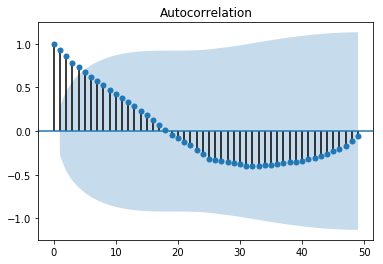

In [37]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series, lags=49)
pyplot.show()

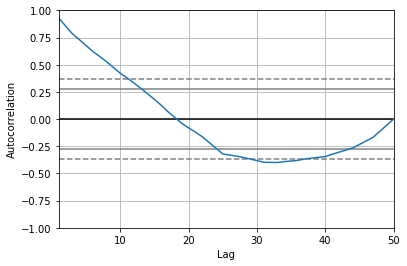

In [38]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

{sensor:22.817000,prediction:20.706859}
{sensor:22.817000,prediction:21.091779}
{sensor:23.817000,prediction:23.882869}
{sensor:23.817000,prediction:24.489653}
{sensor:23.817000,prediction:23.516141}
{sensor:24.114000,prediction:23.135892}
{sensor:24.114000,prediction:24.834174}
{sensor:24.114000,prediction:23.029210}
{sensor:24.114000,prediction:23.192784}
{sensor:24.114000,prediction:25.665882}
{sensor:26.417000,prediction:25.136427}
{sensor:26.417000,prediction:26.180431}
{sensor:26.417000,prediction:26.707919}
{sensor:26.417000,prediction:25.454758}
{sensor:26.417000,prediction:26.347614}
{sensor:26.417000,prediction:22.242110}
{sensor:28.127000,prediction:22.991011}
{sensor:28.127000,prediction:29.124848}
{sensor:28.127000,prediction:28.996525}
{sensor:28.127000,prediction:28.066040}
{sensor:28.327000,prediction:28.728994}
{sensor:28.327000,prediction:25.762894}
{sensor:28.327000,prediction:26.303952}
{sensor:28.327000,prediction:30.227223}
{sensor:28.327000,prediction:30.304761}


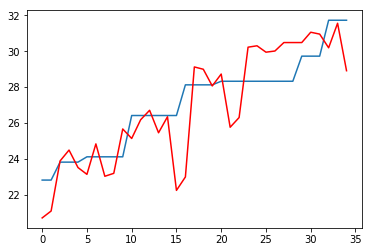

In [44]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
testLength = 35;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (obs, yhat))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 0.599


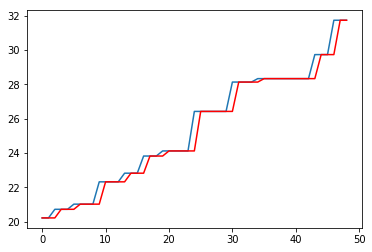

In [43]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('temp_catm1.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
testLength = 49;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## References